<a href="https://www.kaggle.com/code/hikmatullahmohammadi/salary-classification-3-models-coparison?scriptVersionId=107698438" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style='text-align: center; color: white; background: blue; padding: 30px' >
    Salary Classification (Complete ML model)
</h1>
<h2 style='text-align: center; color: white; background: blue; padding: 20px; margin:0'>
    "Three ML Algorithms Comparison"
</h2>


<div style='color: white; background: blue; padding: 20px; margin:0;font-size: 18px'>
    <b>We will cover:</b>
    <ol>
        <li>Data Discovery </li>
        <li>Handling missing values</li>
        <li>Exploratory Data Analysis (EDA)</li>
        <li>Feature Engineering</li>
        <li>Modeling</li>
    </ol>
</div>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
df = pd.read_csv('../input/salary-prediction-classification/salary.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h2 style='text-align: center; background: gold; padding: 20px; border: 2px solid black'>
    1- Data Discovery
</h2>

In [3]:
emp_df = df.copy()

emp_df.shape

(32561, 15)

**Result:**<br />
There are **32561** observations and **15** features

In [4]:
# featues:
emp_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
# An high-level overview on the dataset
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# some statistical values in numeric features
emp_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Result:** <br />
There are some wierd data distribution in features 'capital-gain' & 'capital-loss'. We will handle it later.

In [7]:
# look at the features' data types
emp_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

**Result:**<br />
There is no inappropriate data types

In [8]:
# data types exploratoin
emp_df.select_dtypes(exclude=['object', 'category']).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

**Result:**<br />
There are **6** features of type 'numeric' and **15-6 = 9** features of type 'object.'

---

Now, let's look into each (categorical) feature one-by-one. <br />
We will look for missing values, what are the values in the features and how the values are distributed.<br />
**Note1**: We will not handle missing vlaues in this section, we will only detect them now but handle will handle them later.<br />
**Note2**: We will look into some more details in Data Visualization part.


In [9]:
emp_df['workclass'].value_counts()
# emp_df['workclass'].unique()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [10]:
# replace '?' by NaN
emp_df['workclass'].replace(' ?', np.nan, inplace=True)

In [11]:
emp_df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [12]:
emp_df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [13]:
emp_df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
# replace ' ?' by Nan
emp_df['occupation'].replace(' ?', np.nan, inplace=True)

In [15]:
emp_df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [16]:
emp_df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [17]:
emp_df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [18]:
emp_df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:
# replace ' ?' by NaN
emp_df['native-country'].replace(' ?', np.nan, inplace=True)

In [20]:
emp_df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

<h2 style='text-align: center; background: gold; padding: 20px; border: 2px solid black'>
    2- Handling missing values
</h2>

In [21]:
emp_df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [22]:
# display the rows where 'workclass' is NaN
rows_with_workclass_na = emp_df[emp_df['workclass'].isnull()]
rows_with_workclass_na.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


**Result:** <br />
From the above table we can see that wherever the 'workclass' feature missing, the 'occupation' feature is also missing. Hence, 'occupation' is missing at random.<br />
So, here is how we deal with it:<br />
We will fill 'workclass' NaN values by its mode (most frequent), and then we will fill the 'occupation' missing values by the value which has the highest frequeny with 'workclass' being the mode.


In [23]:
emp_df['workclass'].mode()

0     Private
dtype: object

In [24]:
# occupations where 'workclass' is ' Private'
temp = emp_df['occupation'][emp_df['workclass']==' Private']

temp.mode()

0     Craft-repair
dtype: object

**Result:** <br />
We will fill 'workclass' missing values with ' Private' and 'occupation' missing values with ' Craft-repair' 

In [25]:
emp_df['workclass'].fillna(emp_df['workclass'].mode()[0], inplace=True)
emp_df['workclass'].isnull().sum()

0

In [26]:
emp_df['occupation'].fillna(' Craft-repair', inplace=True)
emp_df['occupation'].isnull().sum()

0

In [27]:
emp_df['native-country'].fillna(emp_df['native-country'].mode()[0], inplace=True)
emp_df['native-country'].isnull().sum()

0

In [28]:
emp_df.isnull().sum().sum()

0

#### --------- No more missing values

<h2 style='text-align: center; background: gold; padding: 20px; border: 2px solid black'>
    3- Exploratory Data Analysis (EDA)
</h2>

First we will do some data visualizations, and then we will get some highly useful [tabular] info using `pd.crosstab()`. **Don't miss that part.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Salary Distribution')

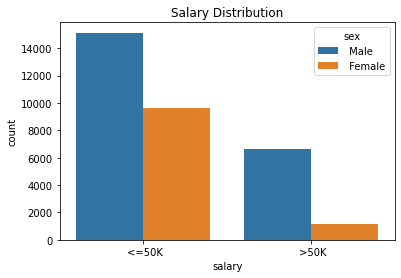

In [29]:
# How the target variable is distributed
ax = sns.countplot(emp_df['salary'], hue=emp_df['sex'])
ax.set_title('Salary Distribution')

In [30]:
def draw_boxen_plot(feature, hue=None):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca()
    sns.boxenplot(data=emp_df, x='salary', y=feature, ax=ax, hue=hue)
    sns.set_style('whitegrid')
    ax.set_title('Salary VS '+feature.title())

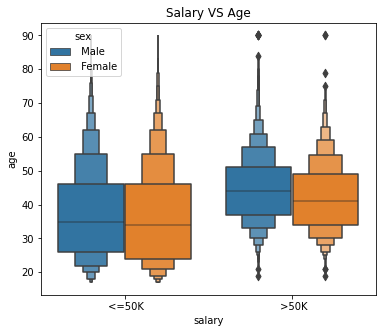

In [31]:
# Salary VS Age
draw_boxen_plot('age', 'sex')

**Result:** <br />
Most of employees bellow 35 have lower income, and 46-50 have higher income. and some more...

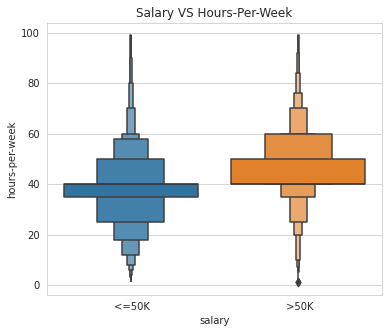

In [32]:
# hours-per-week VS Salary
draw_boxen_plot('hours-per-week')

**Result:** <br />
Employees who work over 40 hours per week are paid more than those who work bellow 40 hours per week. Or most of employees who have >=50k income work over 40 hours weekly.

Text(0.5, 1.0, 'Sex VS Salary')

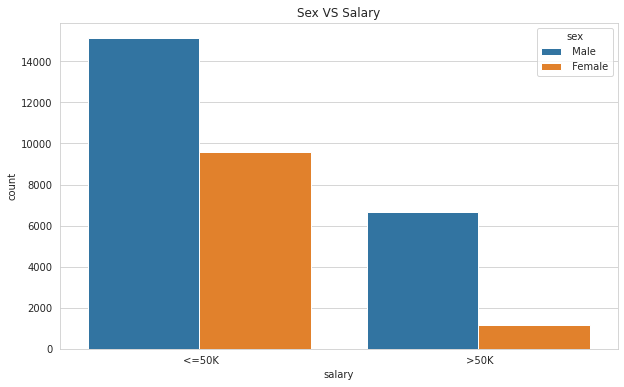

In [33]:
# Sex VS Salary
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=emp_df,x='salary', hue='sex')
ax.set_title('Sex VS Salary')

**Result:** <br />
There are very few women having an income of greater than 50k in comparison with men.

Text(0.5, 1.0, 'Workclass VS Salary')

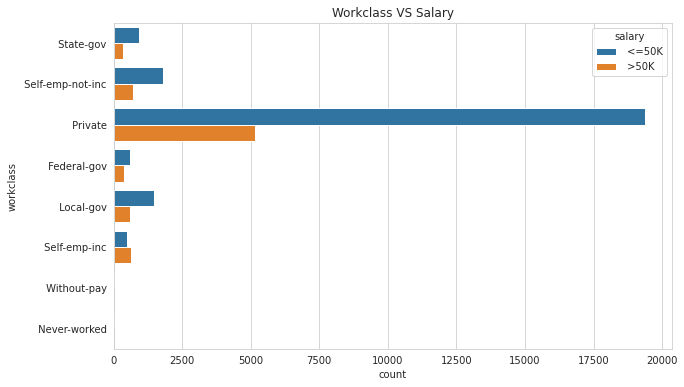

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=emp_df,y='workclass', hue='salary')
ax.set_title('Workclass VS Salary')

**Result:**<br />
Only in *Self-emp-inc* the number of >=50k income is higher than <50k income.


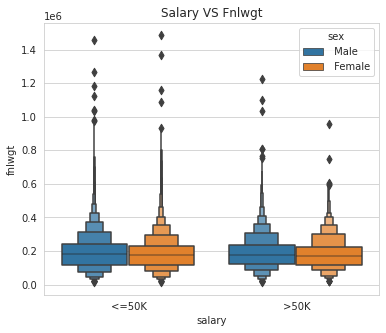

In [35]:
draw_boxen_plot('fnlwgt', 'sex')

**Result:** <br />
Many outliers are detected. In addition, it doesn't seem to be a significant feature. (We will consider removing it.)

Text(0.5, 1.0, 'Education VS Salary')

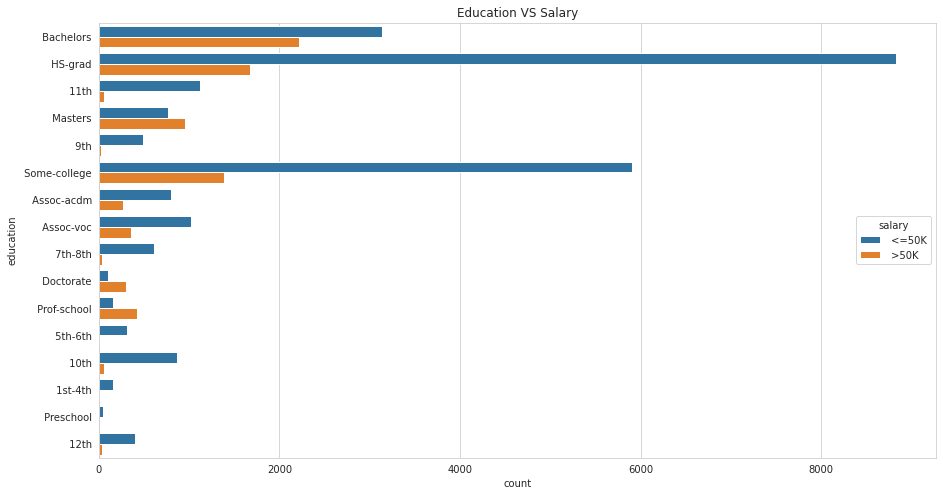

In [36]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=emp_df,y='education', hue='salary')
ax.set_title('Education VS Salary')

**Result:**<br />
Most of employees who are in masters, doctorate or prof-shcool categories have higher income. (>=50k)<br />
Most of HS-grads have an income of <50k, and many more... 

Text(0.5, 1.0, 'Race VS Salary')

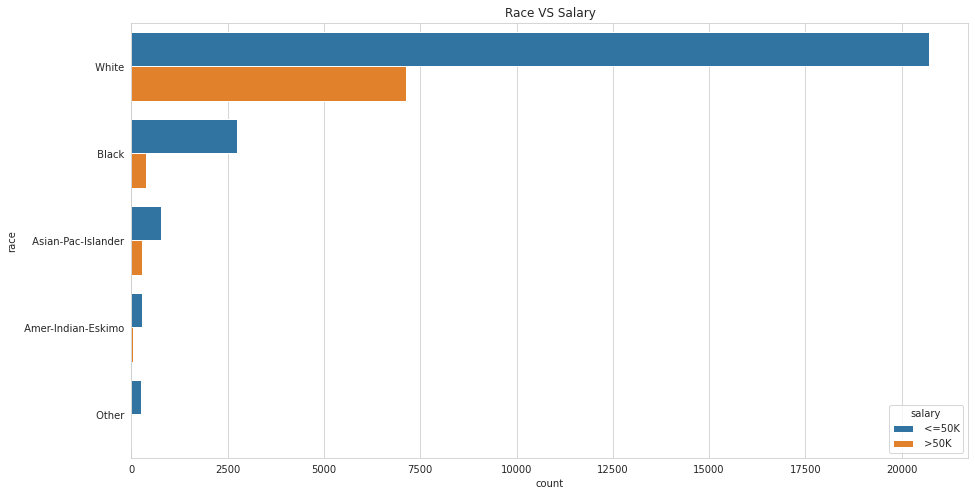

In [37]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=emp_df,y='race', hue='salary')
sns.set_palette('Accent_r')
ax.set_title('Race VS Salary')

In [38]:
emp_df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<AxesSubplot:>

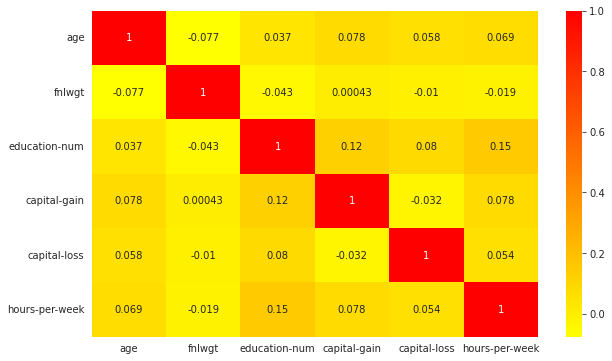

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(emp_df.corr(), annot=True, cmap='autumn_r')

<h4 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
    Now, let's do some EDA (Exploratory Data Analysis) and gain some useful info using pd.crosstab method.
</h4>

In [40]:
def crosstab_counts(feature, normalize=False):
    return pd.crosstab(
        index=emp_df[feature],
        columns='Counts(%)',
        normalize=normalize
    ).apply(lambda x: round(x*100, 4)).sort_values(by='Counts(%)', ascending=False)

In [41]:
crosstab_counts('salary', True).T

salary,<=50K,>50K
col_0,,
Counts(%),75.919,24.081


In [42]:
crosstab_counts('sex', True).T

sex,Male,Female
col_0,,
Counts(%),66.9205,33.0795


In [43]:
# workclass counts
crosstab_counts('workclass', True).T

workclass,Private,Self-emp-not-inc,Local-gov,State-gov,Self-emp-inc,Federal-gov,Without-pay,Never-worked
col_0,,,,,,,,
Counts(%),75.3417,7.8038,6.4279,3.9864,3.4274,2.9483,0.043,0.0215


In [44]:
# education counts
crosstab_counts('education', True)

col_0,Counts(%)
education,
HS-grad,32.2502
Some-college,22.3918
Bachelors,16.4461
Masters,5.2916
Assoc-voc,4.2443
11th,3.6086
Assoc-acdm,3.2769
10th,2.8654
7th-8th,1.9840


In [45]:
# marital-status counts
crosstab_counts('marital-status', True).T

marital-status,Married-civ-spouse,Never-married,Divorced,Separated,Widowed,Married-spouse-absent,Married-AF-spouse
col_0,,,,,,,
Counts(%),45.9937,32.8092,13.6452,3.1479,3.0497,1.2837,0.0706


In [46]:
# relationship count
crosstab_counts('relationship', True).T

relationship,Husband,Not-in-family,Own-child,Unmarried,Wife,Other-relative
col_0,,,,,,
Counts(%),40.5178,25.506,15.5646,10.5832,4.8156,3.0128


In [47]:
crosstab_counts('race', True).T

race,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other
col_0,,,,,
Counts(%),85.4274,9.5943,3.1909,0.9551,0.8323


In [48]:
# Sex vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['sex'],
    margins=True,
    normalize=True
)

sex,Female,Male,All
salary,,,
<=50K,0.294586,0.464605,0.75919
>50K,0.036209,0.204601,0.24081
All,0.330795,0.669205,1.00000


In [49]:
# Race vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['race'],
    margins=True,
    normalize=True
)

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
salary,,,,,,
<=50K,0.008446,0.023433,0.084058,0.007555,0.635699,0.75919
>50K,0.001106,0.008476,0.011885,0.000768,0.218574,0.24081
All,0.009551,0.031909,0.095943,0.008323,0.854274,1.00000


In [50]:
# Relationship vs salary
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['relationship'],
    margins=True,
    normalize=True
)

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
salary,,,,,,,
<=50K,0.223427,0.228771,0.028992,0.153589,0.099137,0.025276,0.75919
>50K,0.181751,0.026289,0.001136,0.002058,0.006695,0.022880,0.24081
All,0.405178,0.255060,0.030128,0.155646,0.105832,0.048156,1.00000


In [51]:
pd.crosstab(
    index=emp_df['salary'],
    columns=emp_df['sex'],
    margins=True
)

sex,Female,Male,All
salary,,,
<=50K,9592,15128,24720
>50K,1179,6662,7841
All,10771,21790,32561


In [52]:
emp_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


<h2 style='text-align: center; background: gold; padding: 20px; border: 2px solid black'>
    4- Feature Engineering
</h2>

In this section, we will only look at **Mutual Information (MI)**

<h4 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
Mutual Information</h4>

Mutual Information (MI) is a mechanism using which we can see how good each variable has an impact on the target variable, for instance. MI Score helps us find the level of effectiveness of a feature on the target variable, the higher a feature's MI Score, the more effective.<br />
**In other words: MI between two features is a measure of the extent to which knowledge of on feature reduces the uncertainty about the other.**

In [53]:
emp_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [54]:
# convert >50k to 1 and <=50k to 0
emp_df['salary'] = emp_df['salary'].map({' >50K': 1, ' <=50K': 0})

In [55]:
X = emp_df.iloc[:, :-1]
y = emp_df['salary']

In [56]:
from sklearn.feature_selection import mutual_info_regression

def get_mi_score(X, y):
    X1 = X.copy()
    # make sure that all discrete features be converted to numbers
    for i in X1.select_dtypes('object').columns:
        X1[i], _ = X1[i].factorize()
    mi_score = mutual_info_regression(X1, y)
    return pd.Series(mi_score, name='MI Score', index=X1.columns).sort_values(ascending=False)

In [57]:
mi_score = get_mi_score(X, y)
mi_score

age               0.063115
relationship      0.061183
education-num     0.057076
capital-gain      0.047727
hours-per-week    0.037968
sex               0.030147
marital-status    0.023021
education         0.021979
capital-loss      0.014926
workclass         0.013349
occupation        0.008563
native-country    0.006181
fnlwgt            0.005231
race              0.002533
Name: MI Score, dtype: float64

[Text(0.5, 1.0, 'MI Scores')]

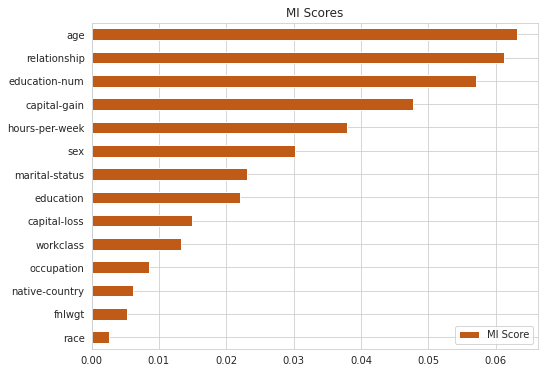

In [58]:
# plot mi scores
mi_score = pd.DataFrame(mi_score).sort_values(by='MI Score')
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
mi_score.plot.barh(ax=ax)
ax.set(title='MI Scores')

In [59]:
# remove two features with lowest mi scores, almost 0
fs = ['native-country', 'fnlwgt']
X.drop(fs, axis=1, inplace=True)
del fs # delete fs variable

In [60]:
# convert categories into numbers
for i in X.select_dtypes('object').columns:
    X[i], _ = X[i].factorize()
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,0,0,13,0,0,0,0,0,2174,0,40
1,50,1,0,13,1,1,1,0,0,0,0,13
2,38,2,1,9,2,2,0,0,0,0,0,40
3,53,2,2,7,1,2,1,1,0,0,0,40
4,28,2,0,13,1,3,2,1,1,0,0,40


In [61]:
X.dtypes

age               int64
workclass         int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
dtype: object

<h2 style='text-align: center; background: gold; padding: 20px; border: 2px solid black'>
    5- Modeling
</h2>

<div style=' background: gold; padding: 20px; border: 2px solid black'>
    Here we will compare three ML classificatoin algorithms. We will see how to implement each of them, and how they perform in comparison with each other.<br />
<ol>
    <li>Logistic Regression</li>
    <li>Random Forest</li>
    <li>K-Nearest Neighbors</li>
</ol>
</div>

In [62]:
# spilt the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)

<h2 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
    5.1- Logistic Regression
</h2>

In [63]:
# fit the model
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state=0, max_iter=X.shape[0])
logR.fit(X_train, y_train)

LogisticRegression(max_iter=32561, random_state=0)

In [64]:
# predict
y_pred = logR.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7804,  433],
       [1476, 1141]])

In [66]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  82.4120140040538


<h2 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
    5.2- Random Forest
</h2>

In [67]:
# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
# predict
y_pred = rf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7623,  614],
       [ 997, 1620]])

In [70]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  85.1575456053068


<h2 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
    5.3- K-Nearest Neighbors (KNN)
</h2>

In [71]:
# Let's first find the best value for K. In this case for 'n_neighbors' argument
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
scores = pd.DataFrame(pd.Series(scores, index=[1,3,5,7,9], name='scores'))\
    .sort_values(by='scores', ascending=False)
scores

,scores
9,0.838677
7,0.832320
5,0.829832
3,0.824857
1,0.813156


From the above chart, k=9 has the highest value. Hence, that is the best choice for K

In [72]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [73]:
# predict
y_pred = knn.predict(X_test)

In [74]:
# calculate accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[7533,  704],
       [1047, 1570]])

In [75]:
# percentage
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print("Accuracy: ", accuracy * 100)

Accuracy:  83.86769854431546


<h2 style='text-align: center; background: gold; padding: 10px; border: 2px solid black'>
    Comparison
</h2>

<div style='background: gold; padding: 10px; border: 2px solid black'>
    Logistic Regression:  <b>82.4488</b><br />
    Random Forest:  <b>85.1575</b><br />
    KNN:  <b>83.8216</b>
</div>

<h4 style='text-align: center;background: gold; padding: 10px; border: 2px solid black'>
    Please check my other works at <a href="https:/kaggle.com/hikmatullahmohammadi" target='_blank'>@hikmatullahmohammadi</a>
</h4>

<h1 style='text-align: center;background: gold; padding: 20px; border: 2px solid black'>
    Regards :)
</h1>